In [42]:
import re
import os
import json
import numpy as np
import os.path as op
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [47]:
INPDIR = "../models/DeepHF/SpCas9HF1LC/"
files = list(filter(lambda x: ".json" in x, [a for a in os.walk(INPDIR)][0][2]))

In [48]:
files

['SpCas9HF1LC_0.9_.json',
 'SpCas9HF1LC_0.4_.json',
 'SpCas9HF1LC_0.5_.json',
 'SpCas9HF1LC_0.99_.json',
 'SpCas9HF1LC_0.05_.json',
 'SpCas9HF1LC_0.95_.json',
 'SpCas9HF1LC_0.2_.json',
 'SpCas9HF1LC_0.3_.json',
 'SpCas9HF1LC_0.75_.json',
 'SpCas9HF1LC_0.1_.json']

In [50]:
model = "SpC"

In [51]:
ordered = list(
    sorted(
        list(
            filter(lambda x: model in x, files)
        ), 
        key=lambda x: x.split("_")[1].replace(".json", "")
    )
)

In [52]:
ordered

['SpCas9HF1LC_0.05_.json',
 'SpCas9HF1LC_0.1_.json',
 'SpCas9HF1LC_0.2_.json',
 'SpCas9HF1LC_0.3_.json',
 'SpCas9HF1LC_0.4_.json',
 'SpCas9HF1LC_0.5_.json',
 'SpCas9HF1LC_0.75_.json',
 'SpCas9HF1LC_0.9_.json',
 'SpCas9HF1LC_0.95_.json',
 'SpCas9HF1LC_0.99_.json']

In [53]:
contents = [json.loads(open(op.join(INPDIR, a), "r").read()) for a in ordered]

In [54]:
contents[0].keys()

dict_keys(['training', 'validation', 'y', 'y_hat', 'y_hat_std', 'y_T', 'y_hat_T', 'y_hat_std_T'])

In [56]:
mae_train = [mean_absolute_error(a["y_T"], a["y_hat_T"])  for a in contents]
mae_H1 = [mean_absolute_error(a["y"], a["y_hat"])  for a in contents]

In [58]:
mstd_train = [np.mean(a["y_hat_std_T"])  for a in contents]
mstd_H1 = [np.mean(a["y_hat_std"])  for a in contents]

In [59]:
proportions = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 0.9, 0.95, 0.99]

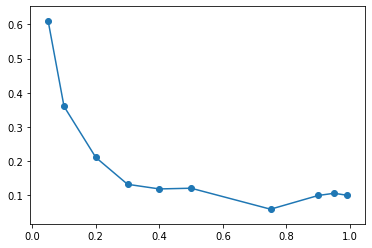

In [61]:
plt.scatter(proportions, mstd_train)
plt.plot(proportions, mstd_H1)

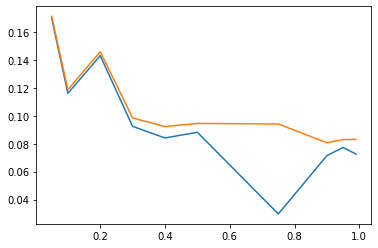

In [62]:
plt.plot(proportions, mae_train)
plt.plot(proportions, mae_H1)

In [157]:
INPDIR = "../models/DeepCpf1KimLC/"

In [158]:
files = list(
    sorted(
        list(filter(lambda x: ".json" in x, [a for a in os.walk(INPDIR)][0][2])),
        key = lambda x: float(x.split("_")[-1].replace(".json", ""))
    )
)
histories = [json.loads(open(op.join(INPDIR, a)).read()) for a in files]

In [165]:
len(histories)

40

In [167]:
%%bash

mkdir ../results/LC/DeepCpf1Kim

In [169]:
for a,b in zip(histories, files):
    with open("../results/LC/DeepCpf1Kim/"+b, "w") as oh:
        oh.write(json.dumps(a))

In [168]:
files

['rnn_elbo_0.05.json',
 'cnn_elbo_0.05.json',
 'cnn_mse_0.05.json',
 'rnn_mse_0.05.json',
 'rnn_mse_0.1.json',
 'cnn_elbo_0.1.json',
 'cnn_mse_0.1.json',
 'rnn_elbo_0.1.json',
 'cnn_elbo_0.2.json',
 'rnn_mse_0.2.json',
 'cnn_mse_0.2.json',
 'rnn_elbo_0.2.json',
 'cnn_elbo_0.3.json',
 'cnn_mse_0.3.json',
 'rnn_mse_0.3.json',
 'rnn_elbo_0.3.json',
 'cnn_elbo_0.4.json',
 'rnn_elbo_0.4.json',
 'rnn_mse_0.4.json',
 'cnn_mse_0.4.json',
 'cnn_elbo_0.5.json',
 'rnn_elbo_0.5.json',
 'rnn_mse_0.5.json',
 'cnn_mse_0.5.json',
 'rnn_elbo_0.75.json',
 'cnn_mse_0.75.json',
 'cnn_elbo_0.75.json',
 'rnn_mse_0.75.json',
 'cnn_elbo_0.9.json',
 'cnn_mse_0.9.json',
 'rnn_mse_0.9.json',
 'rnn_elbo_0.9.json',
 'rnn_elbo_0.95.json',
 'cnn_mse_0.95.json',
 'cnn_elbo_0.95.json',
 'rnn_mse_0.95.json',
 'cnn_mse_0.99.json',
 'rnn_elbo_0.99.json',
 'cnn_elbo_0.99.json',
 'rnn_mse_0.99.json']

In [160]:
mses_tr = [a["training"]["metric"][-1] for a in histories]
mses_t = [a["validation"]["0"]["metric"][-1] for a in histories]

In [161]:
import matplotlib.pyplot as plt

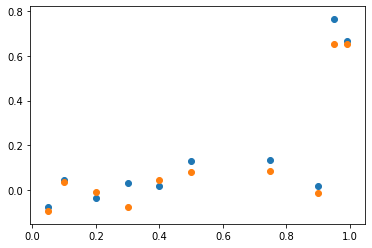

In [162]:
plt.scatter(proportions, mses_tr[0:10])
plt.scatter(proportions, mses_t[0:10])

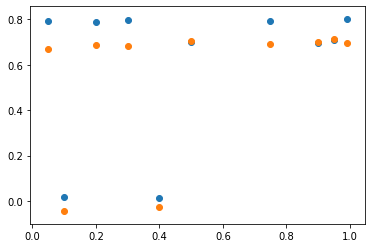

In [163]:
plt.scatter(proportions, mses_tr[10:20])
plt.scatter(proportions, mses_t[10:20])

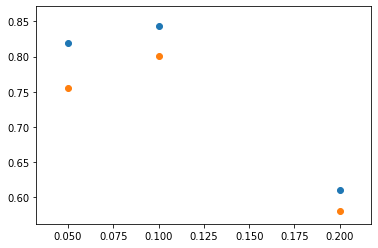

In [122]:
plt.scatter([0.05, 0.1, 0.2], mses_tr)
plt.scatter([0.05, 0.1, 0.2], mses_t)

In [70]:
with open("../models/DeepCpf1KimLC/cnn_elbo_0.4.json", "r") as ih:
    u = json.loads(ih.read())

In [142]:
%%bash

ls ../models/DeepCpf1KimLC/ | grep -c .json

17


In [71]:
u.keys()

dict_keys(['training', 'validation', 'y_T', 'y_hat_T', 'y_hat_std_T', 'y_H1', 'y_hat_H1', 'y_hat_std_H1', 'y_H2', 'y_hat_H2', 'y_hat_std_H2', 'y_H3', 'y_hat_H3', 'y_hat_std_H3'])

In [72]:
from scipy.stats import spearmanr

In [73]:
spearmanr(u["y_T"], u["y_hat_T"])

SpearmanrResult(correlation=0.7949236293754358, pvalue=0.0)

In [74]:
spearmanr(u["y_H1"], u["y_hat_H1"])

SpearmanrResult(correlation=0.6896088528228055, pvalue=5.142654644053664e-183)

In [75]:
spearmanr(u["y_H2"], u["y_hat_H2"])

SpearmanrResult(correlation=0.6791931744087537, pvalue=0.0)

In [76]:
spearmanr(u["y_H3"], u["y_hat_H3"])

SpearmanrResult(correlation=0.47313146216292923, pvalue=8.856847360891798e-71)